Load Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get directory
print(os.getcwd())

c:\Users\Haidah\DSA3101-Group-Project\src


Load and Clean Data

In [36]:
# Load the File
df = pd.read_csv('../data/cleaned_trip_data.csv')

# View File
print(df.head())
print(df.columns.tolist())

selected_columns = ['waiting_time_satisfaction', 'crowdedness_satisfaction', 'comfort', 'safety', 'overall_satisfaction']

     year                       major on_campus main_reason_for_taking_isb  \
0  Year 1  data science and analytics        No             To go to class   
1  Year 3  data science and analytics        No             To go to class   
2  Year 3  data science and analytics        No               To go to MRT   
3  Year 3  data science and analytics        No               To go to MRT   
4  Year 4  data science and analytics        No             To go to class   

   trips_per_day  duration_per_day        date has_exam  \
0              2                 5  2024-09-16       No   
1              3                30  2024-09-16       No   
2              4                30  2024-09-17       No   
3              2                25  2024-09-19       No   
4              2                 5  2024-09-19       No   

                                 start                                  end  \
0  Kent Ridge MRT / Opp Kent Ridge MRT                           LT27 / S17   
1  Kent Ridge MRT 

Boxplot and Histogram for each Feature
###### Create a boxplot and histrogram for each feature to determine the range, skewness and identify any outliers.

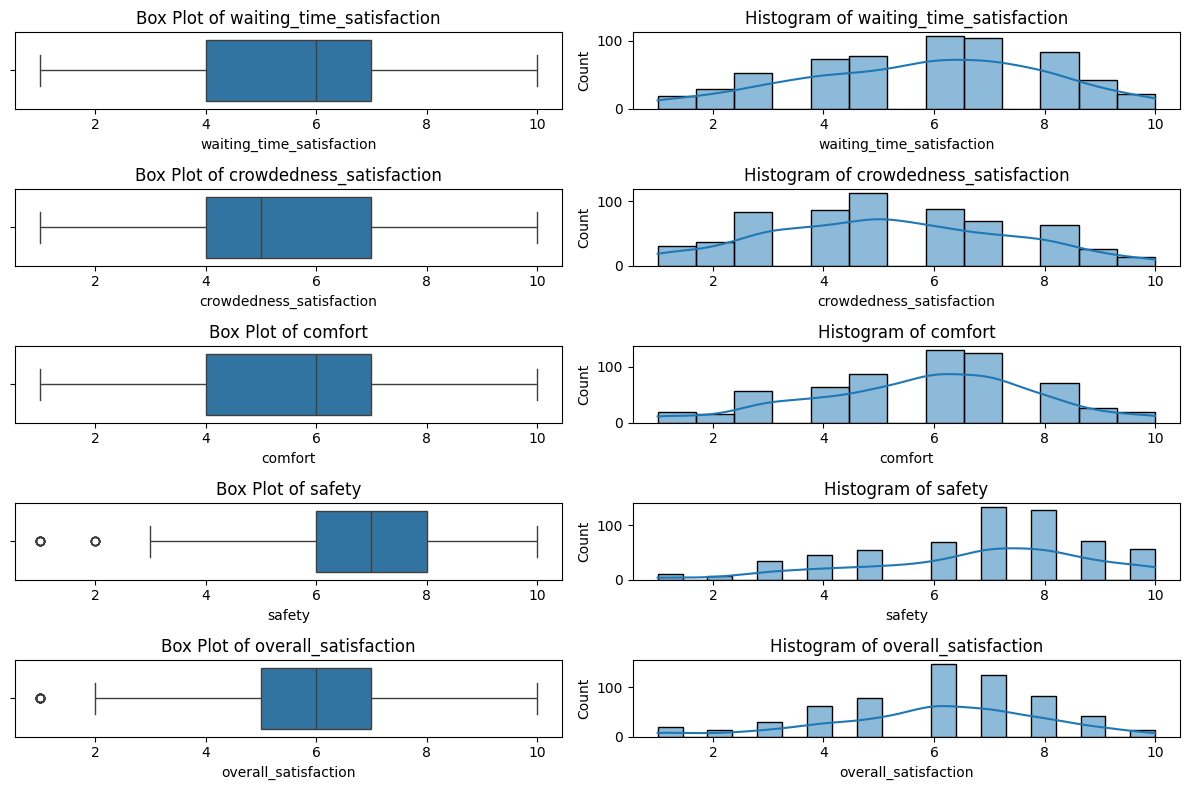

In [40]:
plt.figure(figsize=(12,8))

# Plot Boxplot for each feature
for i, selected_column in enumerate(selected_columns, 1):
    plt.subplot(len(selected_columns), 2, 2*i-1)
    sns.boxplot(x=df[selected_column])
    plt.title(f'Box Plot of {selected_column}')

# Plot Histogram for each feature
for i, selected_column in enumerate(selected_columns, 1):
    plt.subplot(len(selected_columns), 2, 2 * i)
    sns.histplot(df[selected_column], kde=True)
    plt.title(f'Histogram of {selected_column}')

plt.tight_layout()
plt.show()

Correlation Analysis

###### Conduct a correlation analysis between the different factors and overall satisfaction scores to determine a suitable model to determine Key Drivers of Satisfaction and Dissatisfaction.

   waiting_time_satisfaction  crowdedness_satisfaction  comfort  safety  \
0                          7                         7        7       9   
1                          7                         4        4       8   
2                          4                         3        4       6   
3                          6                         6        7       8   
4                          8                         6        7      10   

   overall_satisfaction  
0                     8  
1                     6  
2                     5  
3                     7  
4                     8  


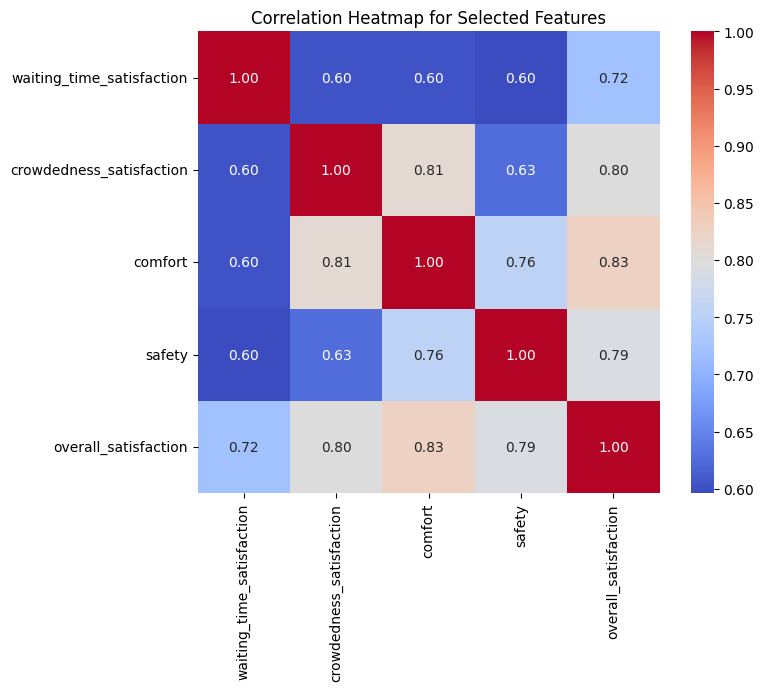

In [35]:
selected_columns = ['waiting_time_satisfaction', 'crowdedness_satisfaction', 'comfort', 'safety', 'overall_satisfaction']
selected_df = df[selected_columns]
print(selected_df.head())

corr_matrix = selected_df.corr()

# Visualise the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt = '.2f', square = True)
plt.title('Correlation Heatmap for Selected Features')
plt.show()



###### From the Correlation Matrix, we observe that there is strong positive correlation between the different factors which iin turn affect the overall satisfaction score. 

###### Between the factors, we notice that the highest positive correlation of 0.81 is between comfort and crowdedness, followed by correlation score of 0.76 between comfort and safety, and then correlation score of 0.63 between crowdedness and safety. The correlation between waiting time and the other factors are of the lowest correlation score of 0.60, indicating that there is a weaker relationship between waiting time and the other factors.

###### From the Correlation Matrix, we can also observe that there is strong positive correlation between each factor and the overall satisfaction score. The order from strongest to weakest correlation is as follows: Comfort, Crowdedness, Safety, Waiting Time. We conduct VIF to determine if multicollinearity is a concern.

Variance Inflation Factor (VIF)
###### Use VIF to determine if the Correlation is significant enough to be considered high multicollinearity.

In [49]:
X = df[['waiting_time_satisfaction', 'crowdedness_satisfaction', 'comfort', 'safety']]
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["selected_column"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data = vif_data[vif_data["selected_column"] != "const"]
print(vif_data)


             selected_column       VIF
1  waiting_time_satisfaction  1.799874
2   crowdedness_satisfaction  3.095979
3                    comfort  4.132626
4                     safety  2.510010


###### As the VIF for all factors are less than 5, multicollinearity is not an issue and Multiple Linear Regression can be conducted to determine main drivers for Satisfaction

Multiple Linear Regression

###### From the survey, we have obtained satisfaction scores for Waiting Time, Crowdedness, Comfort and Safety. We have also obtained Overall Satisfaction Score. Now, we determine how much of each factor affects the Overall Satisfaction.

In [ ]:
# Define the Variables
y = df['overall_satisfaction']

# Run the Linear Regression Model
model = LinearRegression()
model.fit(X,y)

# Print the Coefficients of the Linear Regression Model
print(f'Intercept: {model.intercept_}')
print('Coefficients:')
for feature, coef in zip(X.columns, model.coef_):
    print(f'{feature}: {coef}')

Intercept: 0.30809740876706826
Coefficients:
waiting_time_satisfaction: 0.20695158955640772
crowdedness_satisfaction: 0.2525579097153766
comfort: 0.22185139484965394
safety: 0.2841421993325781


After performing Multiple Linear Regression, we see that the weights for the features affecting overall satisfaction of passengers who board the ISB is as follows (from most to least importance): Safety, Crowdedness, Comfort, Waiting Time.